# 0 开始前

本项目将用游戏 **只狼：影逝二度** 做演示。  

**注：需要具备基本的python编程能力，还要有足够的耐心看教程**  
先部分后整体，所以接下来代码会比较零散，耐心看完教程只后再看整体的代码会轻松很多。

# 1 项目基础部分

- 获取屏幕图像 grab_screen.py
- 控制键盘按键 control_keyboard_keys.py
- 检测键盘按键 detect_keyboard_keys.py

由于游戏一般不提供API，所以获取图像数据以及操作游戏就需要我们自己来解决。

## 1.1 读取游戏画面

代码：[grab_screen.py](https://github.com/ricagj/train_your_own_game_AI/blob/main/game_player/grab_screen.py)

**注：原点在左上角，所以游戏一定要对准左上角，不留间隙**

In [1]:
# 去除边框，只留游戏画面
from game_player.grab_screen import get_full_screen
from game_player.others import get_xywh
screen = get_full_screen()
get_xywh(screen)

In [8]:
# 测试
import cv2
from game_player.grab_screen import get_game_screen

screen = get_game_screen()
cv2.imshow('screen', screen)
cv2.waitKey(0)

ValueError: cannot reshape array of size 2 into shape (0,0,4)

In [ ]:
while True:
    screen = get_game_screen()
    cv2.imshow('screen', screen)
    cv2.waitKey(1)

## 1.2 操作游戏

代码：[control_keyboard_keys.py](https://github.com/ricagj/train_your_own_game_AI/blob/main/game_player/control_keyboard_keys.py)

control_keyboard_keys.py 内定义的函数  
~~~python
def PressKey(hexKeyCode)      # 压键
def ReleaseKey(hexKeyCode)    # 松键
~~~
完成一次按键点击，需要先执行PressKey，然后再执行ReleaseKey，相对于按下去再松开

根据游戏里设置的按键来定义执行相应动作函数  
~~~python
def W(delay=0.1):    # 移动 前
    PressKey(dk['W'])
    time.sleep(delay)

def S(delay=0.1):    # 移动 后
    PressKey(dk['S'])
    time.sleep(delay)

def A(delay=0.1):    # 移动 左
    PressKey(dk['A'])
    time.sleep(delay)

def D(delay=0.1):    # 移动 右
    PressKey(dk['D'])
    time.sleep(delay)

def ReleaseAllKey():    # 统一松开所有已定义的按键
    ReleaseKey(dk['W'])
    ReleaseKey(dk['S'])
    ReleaseKey(dk['A'])
    ReleaseKey(dk['D'])
~~~

你可以自己根据游戏设置来设置相应的按键，用记事本打开 control_keyboard_keys.py ，里面第 57 行 ~ 第 166 行提供了各种按键，然后参照上面的示例自己写出执行相应动作的函数  

In [1]:
import time

from game_player.control_keyboard_keys import W, S, A, D

time.sleep(3)
for _ in range(5):
    print(1)
    W()
    S()
    A()
    D()

1
1
1
1


KeyboardInterrupt: 

In [ ]:
sadwsadw

## 1.3 按键检测

代码：[detect_keyboard_keys.py](https://github.com/ricagj/train_your_own_game_AI/blob/main/game_player/detect_keyboard_keys.py)

detect_keyboard_keys.py 内定义的函数  
~~~python
def key_check()
~~~
调用它时，就会检测当前键盘上正在被按着的按键，然后把这个按键添加进列表 keys ，最后的返回值就是这个列表 keys   
不过，它只会检测我们定义好的按键，其它不会检测，比如下面定义了 **需要判断的按键** 'W', 'S', 'A', 'D', 'T', 'P' ，就只会检测这几个。  
~~~python
"""
W 移动 前
S 移动 后
A 移动 左
D 移动 右
一般我习惯用 T 控制开始，用 P 控制结束，这个不是固定的，如果和你的游戏有按键冲突，完全可以自己换一个按键
"""
def key_check():
    keys = []
    for key in ['W', 'S', 'A', 'D', 'T', 'P']:    # 需要判断的按键就是这里
        if wapi.GetAsyncKeyState(vk[key]):    # wapi.GetAsyncKeyState() ，相应的按键正在被按着，就返回 True, 否则就返回 False
            keys.append(key)    # 相应的按键正在被按着，添加进列表 keys 
    return keys
~~~
你可以自己根据游戏设置来设置相应的按键，用记事本打开 detect_keyboard_keys.py ，里面第 3 行 ~ 第 112 行提供了各种按键，然后参照上面的示例自己添加进**需要判断的按键**

In [ ]:
from game_player.detect_keyboard_keys import key_check

paused = True    # 一开始就是暂停状态，等待我们的按键信号才真正开始，
print("Ready!")

while True:

    keys = key_check()    # 死循环里会不断进行按键检测

    if paused:    # 暂停状态
        if 'T' in keys:    # 只要你按下了 T ，keys = ['T']，用 in 判断出按键信号，下一个循环就会马上进入开始状态
            paused = False
            print('\nStarting!')

    else:    # 开始状态

        print(f'\r {str(keys):<30}', end='')

        if 'P' in keys:    # 只要你按下了 P ，keys = ['P']，用 in 判断出按键信号，然后就会马上就会用 break 终止循环
            break

print('\nDone!')

## 1.4 量化状态

在本项目中，计算奖励的方法一般是根据人物状态的变化，比如目标生命值减少，自身架势增加等。由于无法直接获取这些具体数值，所以一般要通过对状态进行分析来获取。

In [1]:
# 读取游戏画面的代码
import cv2
from game_player.grab_screen import get_game_screen
from game_player.grab_screen import get_full_screen
from game_player.others import get_xywh
screen = get_game_screen()
get_xywh(screen)

Press "ESC" to quit. 

 x=583, x_w=1246, y=1073, y_h=1082



---

在弹出来的窗口中用鼠标左键按顺序依次点击**左下**，**左上**，**右上**，**右下**，一共 4 次，然后按键盘上的“ESC”键，就会自动返回 x, x_w, y, y_h。  
（注意：这个点击的顺序是规定好的，点击的次数也是规定好的）

In [2]:
from game_player.others import get_xywh
get_xywh(screen)

Press "ESC" to quit. 

 x=476, x_w=1141, y=92, y_h=308



用这个方法找到人物状态的所在图像的位置

In [18]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


---

把上面得到的 x, x_w, y, y_h 复制到下面

In [3]:
from game_player.others import roi
screen_roi = roi(screen,  x=326, x_w=774, y=311, y_h=759)
get_xywh(screen_roi)

Press "ESC" to quit. 
vertices number not match


-1

screen_roi 就是那部分你抠出来的图像  
对它做边缘检测，检测人物状态

In [3]:
import numpy as np

In [4]:
canny = cv2.Canny(cv2.GaussianBlur(screen_roi,(3,3),0), 0, 100)
value = canny.argmax(axis=-1)
print(value)
print('平均值', np.mean(value))
print('中位数', np.median(value))

[12 12 12 12 12]
平均值 12.0
中位数 12.0


观察和图像显示的会不会差别太多

**如果数值不太对，可以重新抠一次图，找到更准确的位置**

In [1]:
import pytesseract


pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


# 转换为灰度图像
gray = cv2.cvtColor(screen_roi, cv2.COLOR_BGR2GRAY)

# 二值化处理
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# 使用 Tesseract 进行识别
digit_text = pytesseract.image_to_string(binary, config='--psm 8 digits')

print('识别结果:', digit_text.strip())

NameError: name 'cv2' is not defined

---

封装成函数

In [ ]:
def get_P(img):
    img = roi(img,  x=556, x_w=1255, y=1071, y_h=1086)
    canny = cv2.Canny(cv2.GaussianBlur(img,(3,3),0), 0, 100)
    value = canny.argmax(axis=-1)
    return np.median(value)

然后放进 others.py 指定位置
~~~python
# ---*---

# def get_P(img):
#     img = roi(img, x=402, x_w=484, y=388, y_h=390)
#     canny = cv2.Canny(cv2.GaussianBlur(img,(3,3),0), 0, 100)
#     value = canny.argmax(axis=-1)
#     return np.median(value)

def get_state_1(img):    # 自己改
    return 0

def get_state_2(img):    # 自己改
    return 0

def get_state_3(img):    # 自己改
    return 0

def get_state_4(img):    # 自己改
    return 0

# 不够就自己添加，多了就自己删除

def get_status(img):
    return get_state_1(img), get_state_2(img), get_state_3(img), get_state_4(img)    # 这里也要改成相应的函数名

# ---*---
~~~

---

In [ ]:
import cv2
from game_player.grab_screen import get_game_screen
from game_player.others import get_L
from game_player.others import roi

from game_player.others import get_P2

while True:
    screen = get_game_screen()
    print(f'\r {get_L(screen):>10}', end='')
 

          0

# 2 深度强化学习DQN基础部分之经验回放

## 参考书 **强化学习：原理与Python实现** 
[github地址](https://github.com/ZhiqingXiao/rl-book)  
![参考书](https://camo.githubusercontent.com/ab8a1a3729879574f4854e3b3f6e33ee3dc9500ce1e68e6c91e1df12b5145308/68747470733a2f2f7a686971696e677869616f2e6769746875622e696f2f696d616765732f626f6f6b2f726c2e6a7067)  

---

AI的范围有点广，在强化学习中有个更具体的名称叫Agent，也就是智能体（也有的文献叫真体）。  
- 本项目中的智能体，不是游戏里的可操作对象，而是和我们一样是个玩家。
> 智能体观测环境，获得环境的观测(observation)，记为**O**。这个过程在本项目中相当于**人类看屏幕**。  
> 智能体根据观测做出决策，决定要对环境施加的动作(action)，记为**A**。这个过程在本项目中相当于**人类做决策然后敲键盘**。  
> 环境受智能体动作的影响，改变自己的状态(state)，记为**S**，并给出奖励(reward)，记为**R**。这个过程在本项目中相当于**游戏画面发生变化然后被人类直接观测，奖励也能直接被观测**。  
>> 参考 [第一章：初识强化学习](https://anesck.github.io/M-D-R_learning_notes/RLTPI/notes_html/1.chapter_one.html)  
- 所以，智能体和我们一样，要看屏幕，要按键盘上的按键，通过屏幕上显示的状态变化例如生命值变化来判断上一瞬间自己的操作是好还是坏，并以此做相应的改进。

---

- 关于经验回放
> 经验回放（experience replay）：将经验（即历史的状态、动作、奖励等）存储起来，再按一定规则采样存储的经验。  

经验回放的作用：参考 [第六章：函数近似（function approximation）方法](https://anesck.github.io/M-D-R_learning_notes/RLTPI/notes_html/6.chapter_six.html) 四、深度 Q 学习  

## 2.1 存储经验前的数据搜集 **(S, A, R, S')**

### 2.1.1 状态 **S**(state) 与 观测 **O**(observation)

- 本项目中的 **环境、状态与观测**
    - 环境(environment)
        - 你打开游戏，操作人物在游戏里活动，游戏的地图里你所能探索、能交互的统称**环境**。注：人物也作为环境的一部分
    - 状态(state)
        - 狼、Boss、背景、UI(显示的生命值、物品栏等)等游戏显示画面里面的信息，统称**状态**。注:人物状态也作为环境状态的一部分
    - 观测(observation)
        - 你看到游戏画面并从里面获取信息的过程就叫**观测**。
        - **观测**是从**状态**里获取信息的一种手段，例如人类通过看游戏画面的方式对**状态**进行**观测**，智能体通过截屏的方式对**状态**进行**观测**。

---
为什么"经验回放"在存储的时候明明要求的是 **(S, A, R, S')** ，即 **(状态，动作，奖励，未来的状态)** ，可实际存储的却是 **(O, A, R, O')** ，即 **(观测，动作，奖励，未来的观测)** 。  
~~~python
"节选代码"
self.sekiro_agent.replayer.store(
    observation,
    action,
    reward,
    next_observation
)
~~~
因为只狼这个游戏是完全可观测的，所以观测到的结果，完全可以代表当时的状态，即 S = O, S' = O'.

- 完全可观测
    - 需要的信息，如果状态里都有，则称状态是完全可观测的，否则状态就是不可完全观测。
- 
- 例如围棋就是完全可观测的，因为双方落子位置以及整个棋盘清晰可见。
- 例如只狼这个游戏也是完全可观测的，因为对战双方的动作清晰可见，UI也显示双方的生命值和架势信息。

### 2.1.2 动作 **A**(action)

这部分代码在 **brain.py** 内

导入执行相应动作的函数
~~~python
# ---------- 以下根据 control_keyboard_keys.py 里定义的函数来导入 ----------
from game_player.control_keyboard_keys import W, S, A, D
# ---------- 以上根据 control_keyboard_keys.py 里定义的函数来导入 ----------
~~~

动作的**决策**部分和**执行**部分定义在 **智能体** 内的**choose_action**(行为选择方法)。
~~~python
# 行为选择方法
def choose_action(self, observation):

    # 先看运行的步数(self.step)有没有达到开始回放经验的要求(self.replay_start_size)，没有就随机探索
                                              # 如果已经达到了，就再看随机数在不在最终探索率范围内，在的话也是随机探索
    if self.step <= self.replay_start_size or np.random.rand() < self.min_epsilon:
        q_values = np.random.rand(self.outputs)
        self.who_play = '随机探索'
    else:
        observation = observation.reshape(-1, self.in_height, self.in_width, self.in_channels)
        q_values = self.evaluate_net.predict(observation)[0]
        self.who_play = '模型预测'

    action = np.argmax(q_values)

    # ---------- 以下根据 control_keyboard_keys.py 里定义的函数来修改 ----------

    """
    将所有的动作都用编码成数字，并且数字满足从零开始和正整数的要求。
    例如
        W 移动 前 0
        S 移动 后 1
        A 移动 左 2
        D 移动 右 3
    """

    # 执行动作
    if   action == 0:
        W()
    elif action == 1:
        S()
    elif action == 2:
        A()
    elif action == 3:
        D()
    elif action == 4:    # 等你添加，不需要可以删除
        pass
    # 不够可以添加，注意，一定要是正整数，还要和上一个相邻
    # ---------- 以上根据 control_keyboard_keys.py 里定义的函数来修改 ----------

    return action
~~~

### 2.1.3 奖励 **R**(reward)

这部分代码在 **run.py** 内

奖励部分可是强化学习的核心概念，如果你定义的奖励不能很好的赏罚分明，那智能体也就不能很好的学习。

**游戏不同，人物状态不同，请务必自己设置奖励，也只能由你自己设置奖励，没有标准答案，合理即可。**

~~~python
"节选代码"
class RewardSystem:

    # 获取奖励
    def get_reward(self, cur_status, next_status):
        """
        cur_status 和 next_status 都是存放状态信息的列表，内容：[状态1, 状态2, 状态3, 状态4]
        cur_status  表示当前的人物状态
        next_status 表示未来的人物状态
        """
        if sum(next_status) == 0:

            reward = 0
        else:
            # ---------- 以下根据 others.py 里定义的函数来修改 ----------
            # 通过列表索引的方式，取出相应的信息，用未来的状态信息减去当前的状态信息，得到状态变化值
            s1 = next_status[0] - cur_status[0]
            s2 = next_status[1] - cur_status[1]
            s3 = next_status[2] - cur_status[2]
            s4 = next_status[3] - cur_status[3]

            """
            注意，未来 - 现在
            假如你现在生命值 130（现在），过了一会生命值变成 63（未来）
            计算：s = 63 - 130, s = -67, 生命值降低了67，生命值减低应该惩罚，那么s完全可以当成得分，得到 -67 分。
            
            再假如Boss 现在生命值 112（现在）， 过了一会生命值变成 102（未来）
            计算：s = 102 - 112, s = -10, Boss生命值降低了10，应该奖励才对，但是s为负值，所以要乘上 -1 ，这样才能得到正常的分数。
            
            请根据具体的游戏来定义，不要生搬硬套，别搞得HP掉了还加分
            """
            # 示例 定义得分
            s1 *=  1    # 与 奖励 呈正相关，所以 +
            s2 *= -1    # 与 惩罚 呈正相关，所以 -
            s3 *= -1    # 与 惩罚 呈正相关，所以 -
            s4 *=  1    # 与 奖励 呈正相关，所以 +

            reward = s1 + s2 + s3 +s4
            # ---------- 以上根据 others.py 里定义的函数来修改 ----------
        return reward
~~~

# 3 模型定义

这部分代码在 **brain.py** 内

~~~python
"节选代码"
# 评估网络和目标网络的构建方法
def build_network(self):
    input_shape = [self.in_height, self.in_width, self.in_channels]

    inputs = tf.keras.Input(shape=input_shape, dtype=tf.uint8)
    x = tf.cast(inputs, tf.float32)
    outputs = tf.keras.applications.MobileNetV3Small(input_shape=input_shape, weights=None, classes=self.outputs)(x)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(self.lr),    # 你觉得有更好的可以自己改
        loss=tf.keras.losses.CategoricalCrossentropy(),    # 你觉得有更好的可以自己改
        metrics=[tf.keras.metrics.CategoricalAccuracy()]
    )

    if self.load_weights_path:
        if os.path.exists(self.load_weights_path):
            model.load_weights(self.load_weights_path)
            print('Load ' + self.load_weights_path)
        else:
            print('Nothing to load')

    return model
~~~

In [1]:
from game_player.run import Agent
# target = 'test9-3' 
target = 'a=3-1' 
# target = 'a=4-2' 
agent = Agent(
    save_weights_path = target + '.weights.h5',    # 指定模型权重保存的路径。默认为None，不保存。
    load_weights_path = target + '.weights.h5',     # 指定模型权重加载的路径。默认为None，不加载。
    
#     save_memory_path = target + '.json',     # 指定模型记忆保存的路径。默认为None，不保存
#     load_memory_path = target + '.json'     # 指定模型记忆加载的路径。默认为None，不加载
)


Nothing to load 
Nothing to load 


Ready!

Starting!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  14140.000 , memory: 2452 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  14140.000 , memory: 2453 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  14140.000 , memory: 2454 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step:  14140.000 , memory: 2455 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  14140.000 , memory: 2456 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  14140.000 , memory: 2459 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  14140.000 , memory: 2460 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  14140.000 , memory: 2461 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  14140.000 , memory: 2462 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  14140.000 , memory: 2463 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  14140.000 , memory: 2464 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  14140.000 , memory: 2465 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  14140.000 , memory: 2466 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  14140.000 , memory: 2467 
1/1 ━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  14080.000 , memory: 2543 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  14080.000 , memory: 2545 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  14080.000 , memory: 2546 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step:  14380.000 , memory: 2547 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  14380.000 , memory: 2548 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  14380.000 , memory: 2549 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  14380.000 , memory: 2551 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  14380.000 , memory: 2552 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  14380.000 , memory: 2554 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  14380.000 , memory: 2555 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  14380.000 , memory: 2556 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  14380.000 , memory: 2557 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  14380.000 , memory: 2558 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  14380.000 , memory: 2559 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step:  14380.000 , memory: 2560 
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  17060.000 , memory: 2637 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  17000.000 , memory: 2638 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  16500.000 , memory: 2639 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  16000.000 , memory: 2640 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  16000.000 , memory: 2641 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  16000.000 , memory: 2642 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  16000.000 , memory: 2644 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  16000.000 , memory: 2645 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  16000.000 , memory: 2646 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  16000.000 , memory: 2647 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  16000.000 , memory: 2648 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  16000.000 , memory: 2649 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  16000.000 , memory: 2650 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  16300.000 , memory: 2651 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  16300.000 , memory: 2652 
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  20240.000 , memory: 2729 .
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  20540.000 , memory: 2730 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  20540.000 , memory: 2731 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  20690.000 , memory: 2732 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  20690.000 , memory: 2733 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  20690.000 , memory: 2734 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  20690.000 , memory: 2735 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  20690.000 , memory: 2737 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  20990.000 , memory: 2738 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  20990.000 , memory: 2739 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step:  20990.000 , memory: 2740 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  20990.000 , memory: 2741 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  21290.000 , memory: 2742 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  21290.000 , memory: 2743 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  21390.000 , memory: 2744 
1/1 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  25250.000 , memory: 2815 .
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  25250.000 , memory: 2817 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  25250.000 , memory: 2818 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  25550.000 , memory: 2819 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  25550.000 , memory: 2821 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  25550.000 , memory: 2822 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  25550.000 , memory: 2823 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  25550.000 , memory: 2824 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  25550.000 , memory: 2825 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  25550.000 , memory: 2826 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step:  25550.000 , memory: 2827 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  25550.000 , memory: 2829 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  25550.000 , memory: 2830 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  25550.000 , memory: 2831 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  25550.000 , memory: 2833 
1/1 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  30480.000 , memory: 2912 .
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  30480.000 , memory: 2913 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step:  30480.000 , memory: 2914 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  30480.000 , memory: 2915 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  30480.000 , memory: 2916 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  30480.000 , memory: 2917 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  30480.000 , memory: 2918 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  30480.000 , memory: 2919 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  30480.000 , memory: 2920 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  30480.000 , memory: 2921 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  30480.000 , memory: 2922 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  30480.000 , memory: 2924 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  30480.000 , memory: 2925 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step:  30720.000 , memory: 2927 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  30720.000 , memory: 2928 
1/1 ━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  32470.000 , memory: 2999 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  31970.000 , memory: 3001 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  32090.000 , memory: 3003 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  31590.000 , memory: 3004 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  31090.000 , memory: 3005 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  31090.000 , memory: 3006 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  31090.000 , memory: 3007 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  31390.000 , memory: 3008 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  31390.000 , memory: 3009 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step:  31390.000 , memory: 3010 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  31690.000 , memory: 3011 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  31690.000 , memory: 3012 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  31690.000 , memory: 3013 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  31690.000 , memory: 3014 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step:  35150.000 , memory: 3092 .
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step:  35150.000 , memory: 3093 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step:  35150.000 , memory: 3094 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  35150.000 , memory: 3095 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  35150.000 , memory: 3096 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  35150.000 , memory: 3098 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  35150.000 , memory: 3099 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  35150.000 , memory: 3101 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  35150.000 , memory: 3102 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  35150.000 , memory: 3103 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  35150.000 , memory: 3104 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  35450.000 , memory: 3105 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  35450.000 , memory: 3106 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  35450.000 , memory: 3107 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  35450.000 , memory: 3108 
1/1 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  36650.000 , memory: 3182 .
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  36650.000 , memory: 3183 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  36650.000 , memory: 3184 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  36650.000 , memory: 3185 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  36650.000 , memory: 3186 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  36650.000 , memory: 3188 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  36650.000 , memory: 3189 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step:  36950.000 , memory: 3191 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  36950.000 , memory: 3192 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  36950.000 , memory: 3193 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  36950.000 , memory: 3194 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  36950.000 , memory: 3195 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step:  36950.000 , memory: 3196 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  36950.000 , memory: 3197 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  36950.000 , memory: 3198 
1/1 ━━━━━

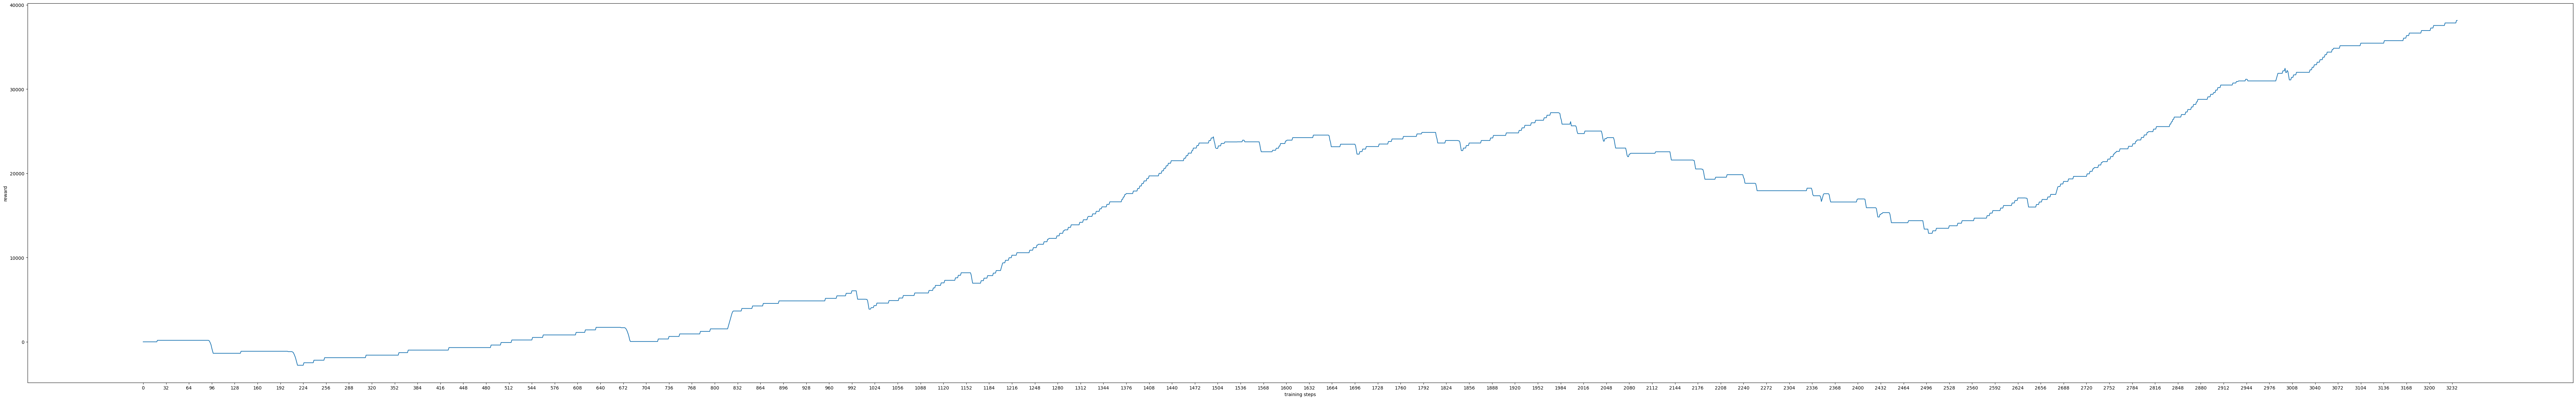


Done!


In [5]:
agent.run()

Ready!

Starting!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step:  38150.000 , memory: 3241 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  38150.000 , memory: 3242 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  38150.000 , memory: 3243 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  38150.000 , memory: 3244 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  38150.000 , memory: 3245 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  38150.000 , memory: 3247 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  38390.000 , memory: 3248 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  38390.000 , memory: 3249 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  38390.000 , memory: 3250 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  38390.000 , memory: 3251 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  38390.000 , memory: 3252 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  38390.000 , memory: 3253 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  38390.000 , memory: 3254 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  38390.000 , memory: 3255 
1/1 ━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  37410.000 , memory: 3327 .
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  37410.000 , memory: 3328 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  37410.000 , memory: 3329 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step:  37410.000 , memory: 3330 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  37410.000 , memory: 3331 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  37410.000 , memory: 3332 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  37410.000 , memory: 3335 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  37710.000 , memory: 3337 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  37710.000 , memory: 3338 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step:  37710.000 , memory: 3339 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  37710.000 , memory: 3341 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  37710.000 , memory: 3342 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step:  37710.000 , memory: 3345 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  37710.000 , memory: 3346 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  37710.000 , memory: 3347 
1/1 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  40110.000 , memory: 3417 .
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  40110.000 , memory: 3418 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  40110.000 , memory: 3419 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  40110.000 , memory: 3420 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  40110.000 , memory: 3421 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  40110.000 , memory: 3422 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  40110.000 , memory: 3423 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  40410.000 , memory: 3424 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  40410.000 , memory: 3427 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  40410.000 , memory: 3428 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  40710.000 , memory: 3429 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  40710.000 , memory: 3430 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  40710.000 , memory: 3431 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  40710.000 , memory: 3433 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  41010.000 , memory: 3434 
1/1 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  41490.000 , memory: 3506 .
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  41490.000 , memory: 3507 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step:  41650.000 , memory: 3509 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  41650.000 , memory: 3510 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  41650.000 , memory: 3511 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  41650.000 , memory: 3512 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  41650.000 , memory: 3513 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  41950.000 , memory: 3515 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  41950.000 , memory: 3516 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  41950.000 , memory: 3517 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  41950.000 , memory: 3518 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  42250.000 , memory: 3519 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  42250.000 , memory: 3520 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  42350.000 , memory: 3521 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  42350.000 , memory: 3522 
1/1 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  46070.000 , memory: 3594 .
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  46070.000 , memory: 3595 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  46370.000 , memory: 3596 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  46370.000 , memory: 3597 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  46370.000 , memory: 3598 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  46370.000 , memory: 3599 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  46670.000 , memory: 3600 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step:  46670.000 , memory: 3601 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  46670.000 , memory: 3602 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  46670.000 , memory: 3603 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  46670.000 , memory: 3604 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  46670.000 , memory: 3606 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step:  46670.000 , memory: 3609 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  46670.000 , memory: 3610 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  46670.000 , memory: 3611 
1/1 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  51260.000 , memory: 3687 .
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  51260.000 , memory: 3688 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  51560.000 , memory: 3689 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  51560.000 , memory: 3690 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  51560.000 , memory: 3693 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step:  51560.000 , memory: 3695 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  51560.000 , memory: 3696 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  51560.000 , memory: 3698 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  51560.000 , memory: 3699 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  51560.000 , memory: 3700 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  51520.000 , memory: 3701 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  51520.000 , memory: 3702 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  51220.000 , memory: 3703 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  50720.000 , memory: 3704 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  50340.000 , memory: 3705 
1/1 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  52940.000 , memory: 3777 .
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  52940.000 , memory: 3778 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step:  52940.000 , memory: 3779 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  52940.000 , memory: 3780 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  52940.000 , memory: 3781 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  52940.000 , memory: 3782 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  52940.000 , memory: 3783 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  52940.000 , memory: 3785 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  52940.000 , memory: 3787 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  52940.000 , memory: 3788 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  52940.000 , memory: 3789 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  52940.000 , memory: 3790 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  52940.000 , memory: 3791 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  52940.000 , memory: 3792 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  53180.000 , memory: 3793 
1/1 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  56280.000 , memory: 3869 .
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  56580.000 , memory: 3870 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  56580.000 , memory: 3871 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  56580.000 , memory: 3872 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  56580.000 , memory: 3873 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  56580.000 , memory: 3874 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  56580.000 , memory: 3875 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  56880.000 , memory: 3876 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  56880.000 , memory: 3877 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  57180.000 , memory: 3879 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  57180.000 , memory: 3881 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  57180.000 , memory: 3882 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  57180.000 , memory: 3884 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step:  57180.000 , memory: 3885 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  57180.000 , memory: 3886 
1/1 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step:  58080.000 , memory: 3959 .
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  58080.000 , memory: 3960 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  58080.000 , memory: 3961 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  58080.000 , memory: 3962 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  58080.000 , memory: 3963 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  58080.000 , memory: 3965 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  58080.000 , memory: 3966 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  58080.000 , memory: 3967 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  58060.000 , memory: 3968 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  57940.000 , memory: 3970 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  57440.000 , memory: 3971 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  56940.000 , memory: 3972 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  56940.000 , memory: 3973 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  57240.000 , memory: 3975 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  57240.000 , memory: 3976 
1/1 ━━━━━

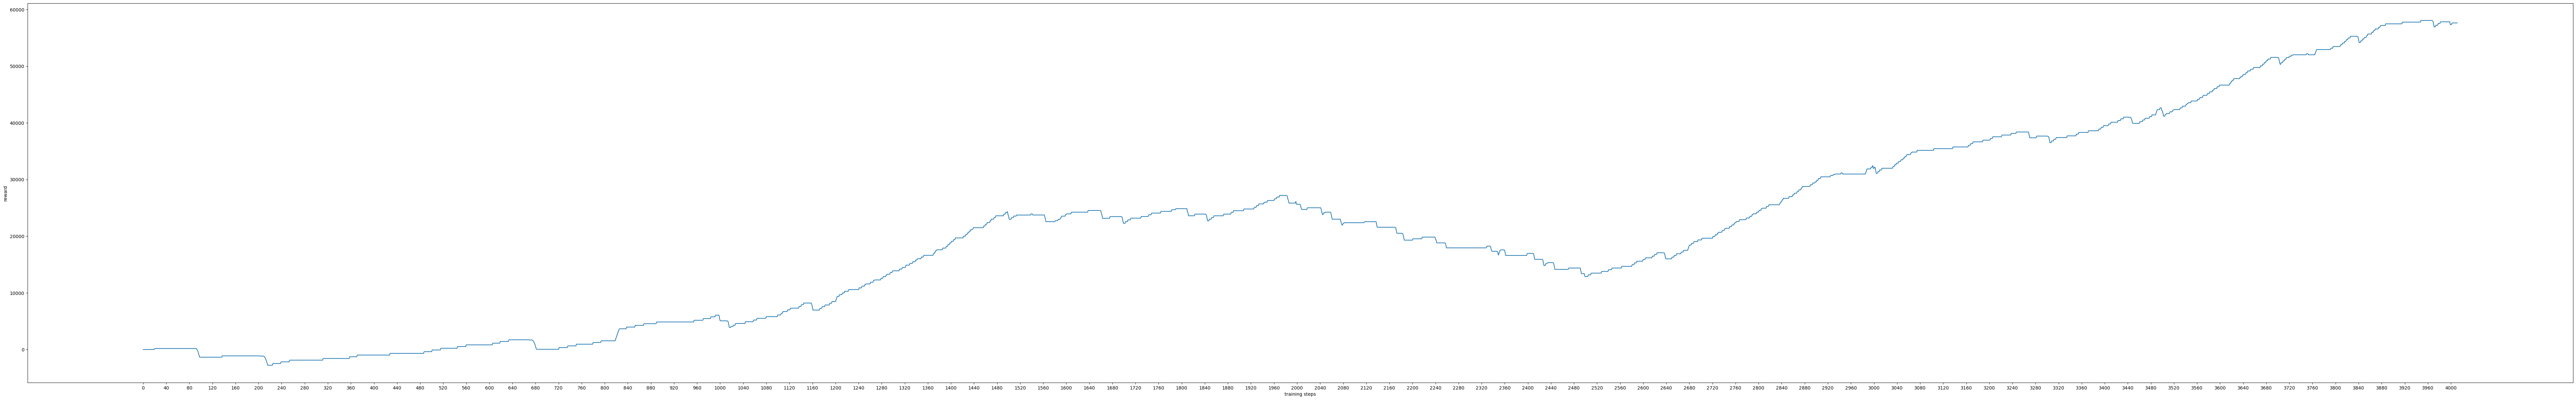


Done!


In [6]:
agent.run()

Ready!

Starting!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step:  57640.000 , memory: 4013 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  57640.000 , memory: 4014 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  57640.000 , memory: 4015 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  57640.000 , memory: 4016 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  57820.000 , memory: 4017 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step:  57820.000 , memory: 4018 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  57820.000 , memory: 4019 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  57820.000 , memory: 4020 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step:  57820.000 , memory: 4021 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  57820.000 , memory: 4022 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  57820.000 , memory: 4023 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  57820.000 , memory: 4024 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  57820.000 , memory: 4025 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  57820.000 , memory: 4026 
1/1 ━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  56940.000 , memory: 4102 .
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  56940.000 , memory: 4103 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  56940.000 , memory: 4104 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  56940.000 , memory: 4105 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  56940.000 , memory: 4106 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  56940.000 , memory: 4107 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  56940.000 , memory: 4108 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  56940.000 , memory: 4109 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  56940.000 , memory: 4110 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  56940.000 , memory: 4111 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  56940.000 , memory: 4112 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step:  56940.000 , memory: 4113 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  57240.000 , memory: 4115 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  57240.000 , memory: 4116 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  57240.000 , memory: 4117 
1/1 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  59640.000 , memory: 4191 .
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  59940.000 , memory: 4192 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step:  59940.000 , memory: 4193 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  59940.000 , memory: 4194 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  59940.000 , memory: 4195 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  60240.000 , memory: 4196 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  60240.000 , memory: 4197 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  60240.000 , memory: 4198 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step:  60240.000 , memory: 4199 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  60240.000 , memory: 4200 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  60240.000 , memory: 4201 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  60240.000 , memory: 4202 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  60240.000 , memory: 4203 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  60240.000 , memory: 4205 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  60240.000 , memory: 4207 
1/1 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  63840.000 , memory: 4277 .
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  63840.000 , memory: 4278 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  63840.000 , memory: 4280 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  63840.000 , memory: 4281 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  63840.000 , memory: 4282 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  63840.000 , memory: 4283 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  63840.000 , memory: 4284 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  63840.000 , memory: 4285 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  63840.000 , memory: 4286 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  63840.000 , memory: 4287 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  63840.000 , memory: 4288 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  64140.000 , memory: 4289 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  64140.000 , memory: 4290 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  64140.000 , memory: 4291 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  64140.000 , memory: 4292 
1/1 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  68470.000 , memory: 4365 .
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  68470.000 , memory: 4366 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  68470.000 , memory: 4367 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  68470.000 , memory: 4368 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  68470.000 , memory: 4369 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  68770.000 , memory: 4370 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  68770.000 , memory: 4372 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  68770.000 , memory: 4373 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  68770.000 , memory: 4374 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  69070.000 , memory: 4375 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  69070.000 , memory: 4376 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  69070.000 , memory: 4377 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  69070.000 , memory: 4378 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  69370.000 , memory: 4379 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  69370.000 , memory: 4380 
1/1 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  73050.000 , memory: 4456 .
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  73050.000 , memory: 4457 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  73050.000 , memory: 4459 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  73050.000 , memory: 4460 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  73050.000 , memory: 4461 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  73050.000 , memory: 4462 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  73350.000 , memory: 4463 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step:  73350.000 , memory: 4464 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  73350.000 , memory: 4466 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  73650.000 , memory: 4467 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  73650.000 , memory: 4468 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  73950.000 , memory: 4469 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  73950.000 , memory: 4470 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  73950.000 , memory: 4471 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  73950.000 , memory: 4472 
1/1 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  75310.000 , memory: 4543 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  75310.000 , memory: 4544 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  75310.000 , memory: 4545 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  75310.000 , memory: 4546 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  75310.000 , memory: 4547 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  75310.000 , memory: 4548 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  75310.000 , memory: 4549 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  75310.000 , memory: 4550 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  75310.000 , memory: 4551 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  75310.000 , memory: 4552 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  75310.000 , memory: 4553 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  75310.000 , memory: 4554 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  75310.000 , memory: 4555 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  75310.000 , memory: 4556 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  75310.000 , memory: 4557 
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  78450.000 , memory: 4627 .
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  78450.000 , memory: 4628 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  78450.000 , memory: 4629 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  78450.000 , memory: 4630 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  78450.000 , memory: 4631 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  78750.000 , memory: 4632 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step:  78750.000 , memory: 4633 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  78850.000 , memory: 4634 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  78850.000 , memory: 4635 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  78850.000 , memory: 4636 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step:  78850.000 , memory: 4637 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  78850.000 , memory: 4638 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  78850.000 , memory: 4639 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  78850.000 , memory: 4640 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step:  78850.000 , memory: 4641 
1/1 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  78610.000 , memory: 4718 .
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step:  78610.000 , memory: 4719 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  78610.000 , memory: 4721 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  78610.000 , memory: 4723 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  78610.000 , memory: 4724 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  78610.000 , memory: 4725 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  78610.000 , memory: 4726 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  78610.000 , memory: 4727 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step:  78570.000 , memory: 4728 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  78570.000 , memory: 4729 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  78130.000 , memory: 4730 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  77630.000 , memory: 4731 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  77590.000 , memory: 4732 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  77590.000 , memory: 4733 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  77890.000 , memory: 4734 
1/1 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  79690.000 , memory: 4808 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  79690.000 , memory: 4809 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  79690.000 , memory: 4810 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step:  79990.000 , memory: 4811 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  79990.000 , memory: 4812 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  79990.000 , memory: 4813 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  79990.000 , memory: 4814 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  79990.000 , memory: 4815 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  79990.000 , memory: 4816 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step:  79990.000 , memory: 4817 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  79990.000 , memory: 4818 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step:  79990.000 , memory: 4819 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  79990.000 , memory: 4820 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step:  79990.000 , memory: 4821 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step:  79990.000 , memory: 4822 
1/1 ━━━━━━

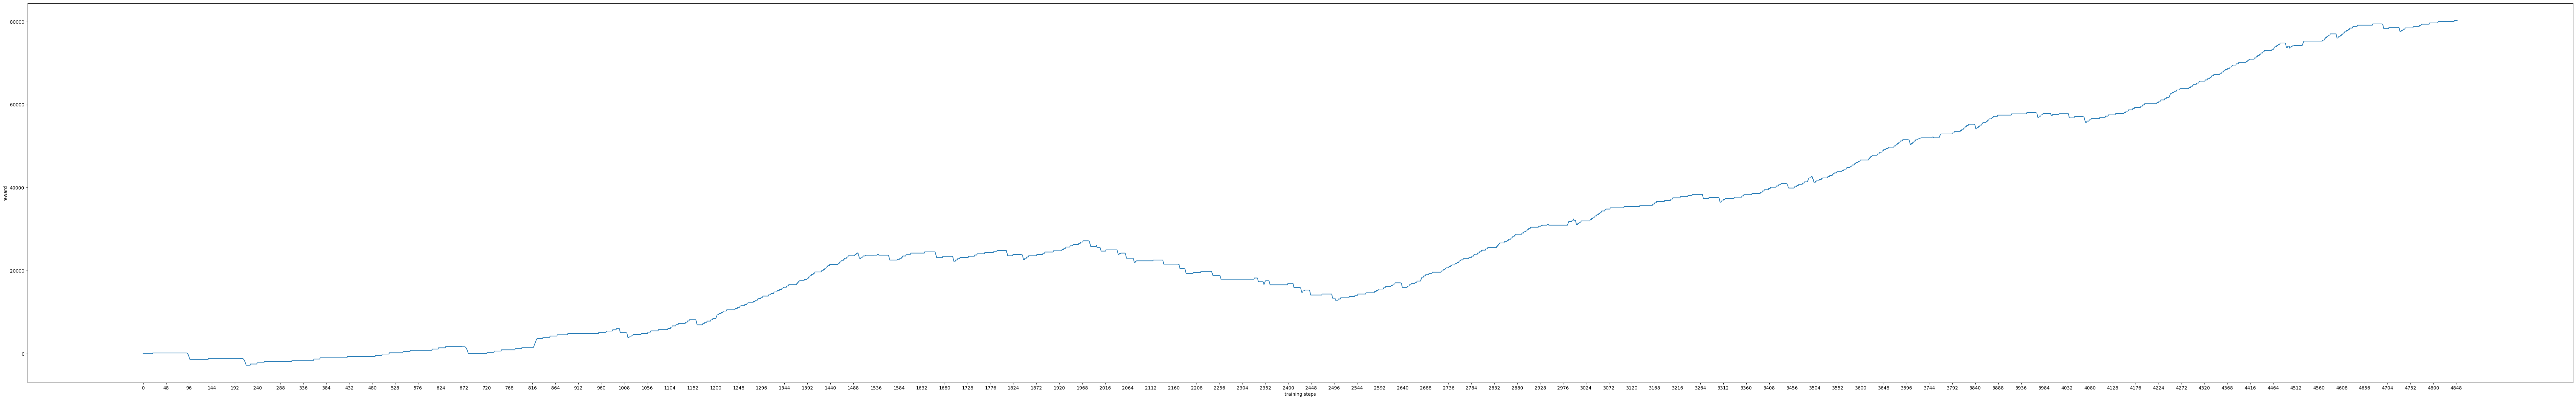


Done!


In [7]:
agent.run()